In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (14, 8)

In [35]:
matches=pd.read_csv('LPLmatches.csv', index_col=0)
print(matches.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'LPLmatches.csv'

In [4]:
matches.head()

,season,team1,team2,toss_winner,toss_decision,result,winner,winner_runs,winner_wickets,player_of_match,venue,city,umpire1,umpire2,reserve_umpire,tv_umpire,match_referee,eliminator
id,,,,,,,,,,,,,,,,,,
1,2020/21,Kandy Tuskers,Colombo Kings,Colombo Kings,field,tie,Kandy Tuskers,0,0,LD Chandimal,Mahinda Rajapaksa International Cricket Stadiu...,Hambantota,LE Hannibal,RR Wimalasiri,RMPJ Rambukwella,RSA Palliyaguruge,GF Labrooy,Colombo Kings
2,2020/21,Galle Gladiators,Jaffna Stallions,Galle Gladiators,bat,normal,Jaffna Stallions,0,8,WIA Fernando,Mahinda Rajapaksa International Cricket Stadiu...,Hambantota,ID Gunawardene,LE Hannibal,Keerthi Bandara,RMPJ Rambukwella,WC Labrooy,NaN
3,2020/21,Dambulla Viiking,Kandy Tuskers,Kandy Tuskers,field,normal,Dambulla Viiking,4,0,MD Shanaka,Mahinda Rajapaksa International Cricket Stadiu...,Hambantota,JWHD Boteju,RR Wimalasiri,RA Kottahachchi,RSA Palliyaguruge,BCMS Mendis,NaN
4,2020/21,Colombo Kings,Galle Gladiators,Galle Gladiators,field,normal,Colombo Kings,34,0,AD Russell,Mahinda Rajapaksa International Cricket Stadiu...,Hambantota,RMPJ Rambukwella,RD Kottahachchi,EJAPAM Jayasooriya,LE Hannibal,GF Labrooy,NaN
5,2020/21,Jaffna Stallions,Dambulla Viiking,Dambulla Viiking,field,normal,Jaffna Stallions,66,0,NLTC Perera,Mahinda Rajapaksa International Cricket Stadiu...,Hambantota,Keerthi Bandara,RR Wimalasiri,ID Gunawardene,RSA Palliyaguruge,WC Labrooy,NaN


In [5]:
matches.describe()

,winner_runs,winner_wickets
count,47.000000,47.000000
mean,18.021277,2.510638
std,26.528483,3.147617
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,26.500000,5.500000
max,102.000000,9.000000


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1 to 47
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           47 non-null     object
 1   team1            47 non-null     object
 2   team2            47 non-null     object
 3   toss_winner      47 non-null     object
 4   toss_decision    47 non-null     object
 5   result           47 non-null     object
 6   winner           47 non-null     object
 7   winner_runs      47 non-null     int64 
 8   winner_wickets   47 non-null     int64 
 9   player_of_match  46 non-null     object
 10  venue            47 non-null     object
 11  city             47 non-null     object
 12  umpire1          47 non-null     object
 13  umpire2          47 non-null     object
 14  reserve_umpire   47 non-null     object
 15  tv_umpire        47 non-null     object
 16  match_referee    47 non-null     object
 17  eliminator       1 non-null      obje

In [7]:
matches['season'].unique()

array(['2020/21', '2021/22'], dtype=object)

In [8]:
max(matches['winner_runs'])

102

In [9]:
# Match won by the maximum margin of runs
matches.iloc[matches['winner_runs'].idxmax()]

season                                  2021/22
team1                           Dambulla Giants
team2                            Kandy Warriors
toss_winner                     Dambulla Giants
toss_decision                               bat
result                                   normal
winner                           Kandy Warriors
winner_runs                                   0
winner_wickets                                6
player_of_match                       RS Bopara
venue              R Premadasa Stadium, Colombo
city                                    Colombo
umpire1                           RR Wimalasiri
umpire2                         RD Kottahachchi
reserve_umpire                   ID Gunawardene
tv_umpire                           LE Hannibal
match_referee                       BCMS Mendis
eliminator                                  NaN
Name: 41, dtype: object

In [10]:
max(matches['winner_wickets'])

9

In [11]:
# Match won by maximum wickets
matches.iloc[matches['winner_wickets'].idxmax()]

season                                                       2020/21
team1                                               Dambulla Viiking
team2                                                  Colombo Kings
toss_winner                                            Colombo Kings
toss_decision                                                  field
result                                                        normal
winner                                                 Colombo Kings
winner_runs                                                        0
winner_wickets                                                     6
player_of_match                                           Qais Ahmad
venue              Mahinda Rajapaksa International Cricket Stadiu...
city                                                      Hambantota
umpire1                                              HDPK Dharmasena
umpire2                                             RMPJ Rambukwella
reserve_umpire                    

In [12]:
# Match won by minimum margin of runs (not by 1 run)
matches.iloc[matches[matches['winner_runs'].ge(1)].winner_runs.idxmin()]

season                                  2021/22
team1                            Kandy Warriors
team2                              Jaffna Kings
toss_winner                        Jaffna Kings
toss_decision                             field
result                                   normal
winner                             Jaffna Kings
winner_runs                                   0
winner_wickets                                7
player_of_match                    Shoaib Malik
venue              R Premadasa Stadium, Colombo
city                                    Colombo
umpire1                             LE Hannibal
umpire2                         RD Kottahachchi
reserve_umpire                   ID Gunawardene
tv_umpire                      RMPJ Rambukwella
match_referee                       BCMS Mendis
eliminator                                  NaN
Name: 35, dtype: object

In [13]:
# Match won by minimum wickets (not by 0 wickets)
matches.iloc[matches[matches['winner_wickets'].ge(1)].winner_wickets.idxmin()]

season                                                       2020/21
team1                                               Jaffna Stallions
team2                                               Dambulla Viiking
toss_winner                                         Dambulla Viiking
toss_decision                                                  field
result                                                        normal
winner                                              Jaffna Stallions
winner_runs                                                       37
winner_wickets                                                     0
player_of_match                                            J Charles
venue              Mahinda Rajapaksa International Cricket Stadiu...
city                                                      Hambantota
umpire1                                                  LE Hannibal
umpire2                                            RSA Palliyaguruge
reserve_umpire                    

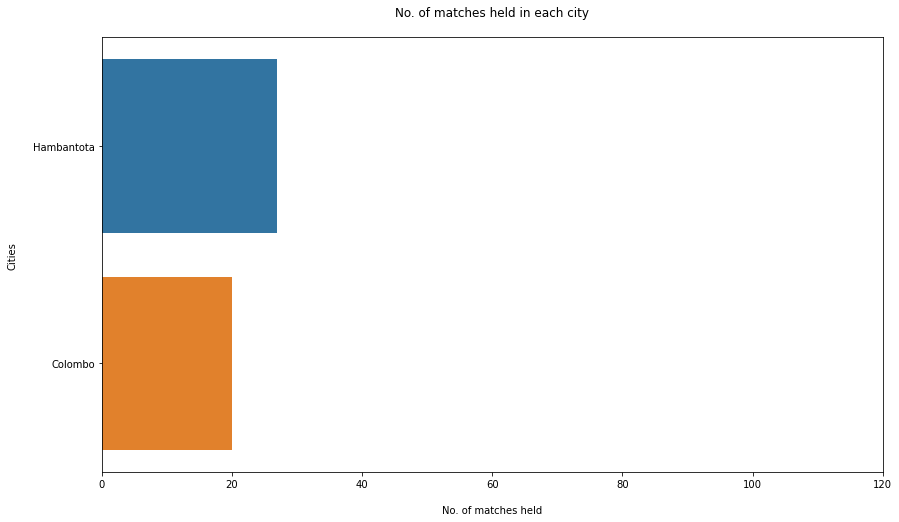

In [14]:
# Plot to visualise the no. of matches held in each city
sns.countplot(y='city', data=matches)
plt.title('No. of matches held in each city\n')
plt.xlabel('\nNo. of matches held')
plt.ylabel('Cities\n')
plt.xlim([0,120])
plt.show()

In [15]:
# No. of matches won by each team
matches['winner'].value_counts()

Galle Gladiators    8
Jaffna Kings        8
Jaffna Stallions    6
Dambulla Viiking    5
Colombo Kings       5
Dambulla Giants     4
Colombo Stars       4
Kandy Tuskers       3
no result           2
Kandy Warriors      2
Name: winner, dtype: int64

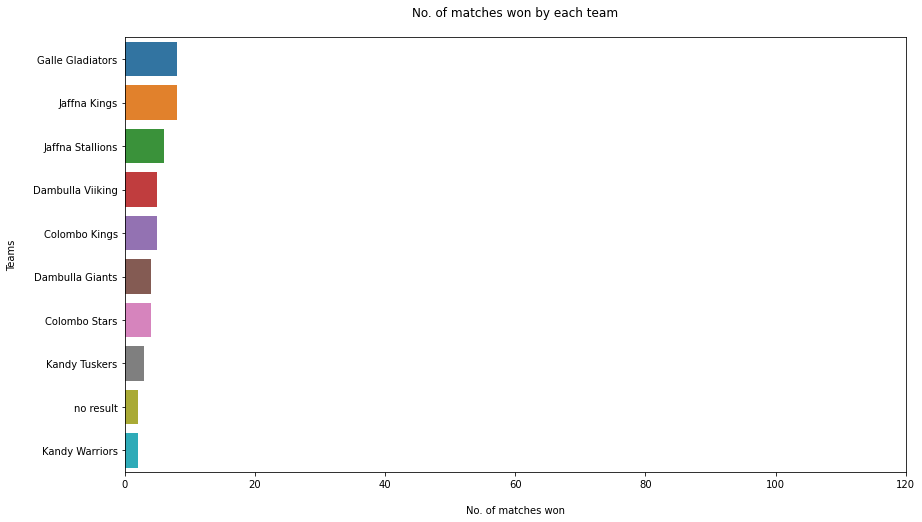

In [16]:
# Plot to visualise the no. of matches won by each team
data=matches['winner'].value_counts()
fig, ax=plt.subplots()
ax.set_xlim([0,120])
sns.barplot(y=data.index, x=data, orient='h')
plt.title('No. of matches won by each team\n')
plt.xlabel("\nNo. of matches won")
plt.ylabel('Teams\n')
plt.show()

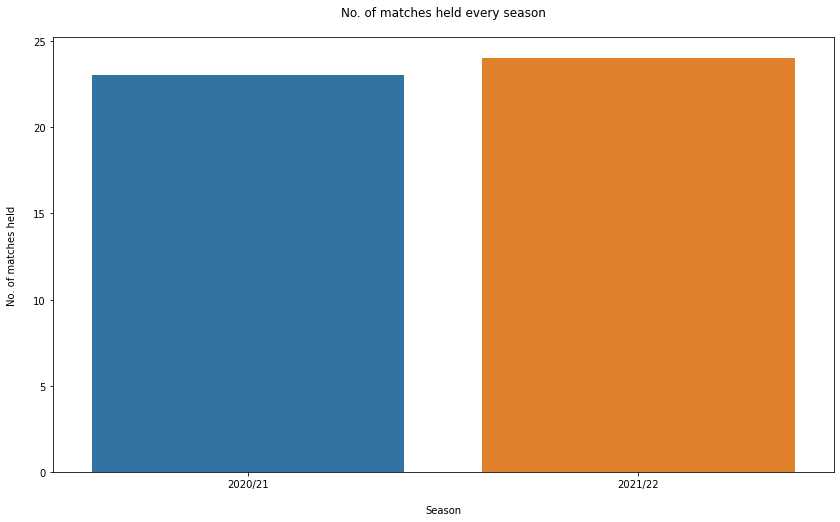

In [17]:
# Plot to visualise the no. of matches held every season
sns.countplot(x='season', data=matches)
plt.title('No. of matches held every season\n')
plt.xlabel('\nSeason')
plt.ylabel('No. of matches held\n')
plt.show()

In [18]:
# Picking the top 10 players based on the no. of Man of Match (MOM) awards won
mom=matches['player_of_match'].value_counts()[:10]
mom

WIA Fernando    4
LD Chandimal    3
NLTC Perera     3
RS Bopara       2
PD Salt         2
SR Patel        2
Shoaib Malik    2
D Lakshan       2
MD Shanaka      2
PVD Chameera    1
Name: player_of_match, dtype: int64

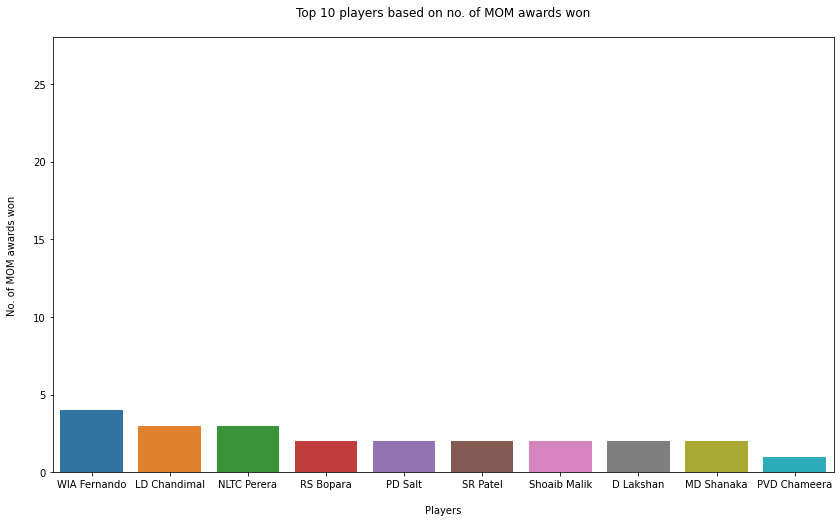

In [19]:
# Plot to visualise the top 10 players based on the no. of MOM awards won
fig, ax=plt.subplots()
ax.set_ylim([0,28])
ax.set_title('Top 10 players based on no. of MOM awards won\n')
sns.barplot(x=mom.index, y=mom, orient='v')
plt.ylabel('No. of MOM awards won\n')
plt.xlabel('\nPlayers')
plt.show()

In [20]:
# Does winning the toss mean winning the match?
winnerwinner=matches['toss_winner']== matches['winner']
winnerwinner.groupby(winnerwinner).size()

False    28
True     19
dtype: int64

In [21]:
# % of games where the toss winning team lost the match (indicated by false) and toss winning team won the match(indicated by true)
round(winnerwinner.groupby(winnerwinner).size() / winnerwinner.count() * 100,2)

False    59.57
True     40.43
dtype: float64

In [22]:
# How many times did the captain choose fielding and batting after winning the toss?
matches['toss_decision'].value_counts()

bat      24
field    23
Name: toss_decision, dtype: int64

In [24]:
# % of matches where the toss winning team's captain chose fielding and batting
round(matches['toss_decision'].value_counts()/matches['toss_decision'].count()*100, 2)

bat      51.06
field    48.94
Name: toss_decision, dtype: float64

In [25]:
# Different results for games
matches['result'].value_counts()

normal       44
no result     2
tie           1
Name: result, dtype: int64

In [26]:
# How many times did each team win the toss?
matches['toss_winner'].value_counts()

Galle Gladiators    9
Dambulla Giants     8
Jaffna Kings        6
Dambulla Viiking    5
Jaffna Stallions    5
Colombo Kings       4
Colombo Stars       4
Kandy Tuskers       3
Kandy Warriors      3
Name: toss_winner, dtype: int64

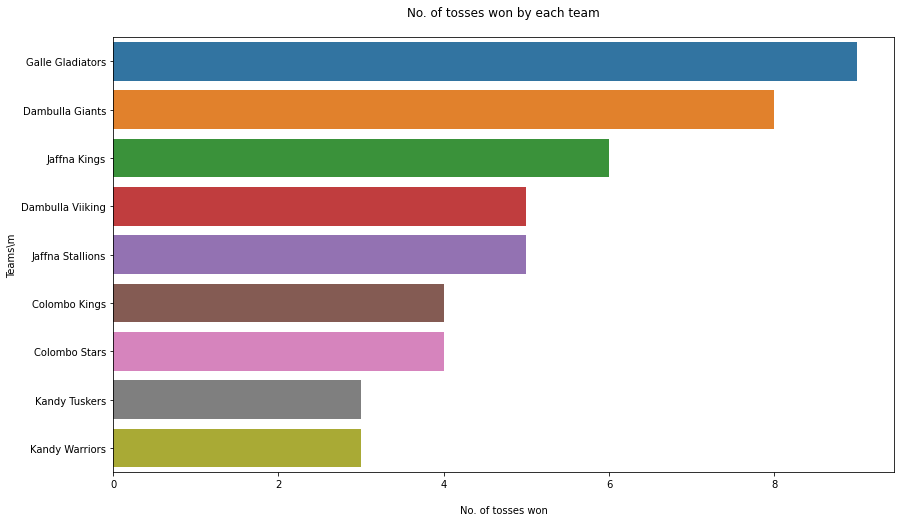

In [27]:
# Plot to visualise the no. of tosses won by each team
toss=matches['toss_winner'].value_counts()
fig, ax=plt.subplots()
ax.set_title('No. of tosses won by each team\n')
sns.barplot(y=toss.index, x=toss, orient='h')
plt.xlabel('\nNo. of tosses won')
plt.ylabel('Teams\m')
plt.show()

In [29]:
# Best venue for defending your total
matches.venue[matches.winner_runs!=0].mode()

0    Mahinda Rajapaksa International Cricket Stadiu...
dtype: object

In [31]:
# Best venue to chase a total
matches.venue[matches.winner_wickets!=0].mode()

0    Mahinda Rajapaksa International Cricket Stadiu...
dtype: object

In [32]:
# Best defending team
matches.winner[matches.winner_runs!=0].mode()

0    Jaffna Kings
dtype: object

In [33]:
# Best chasing team
matches.winner[matches.winner_wickets!=0].mode()

0    Galle Gladiators
dtype: object

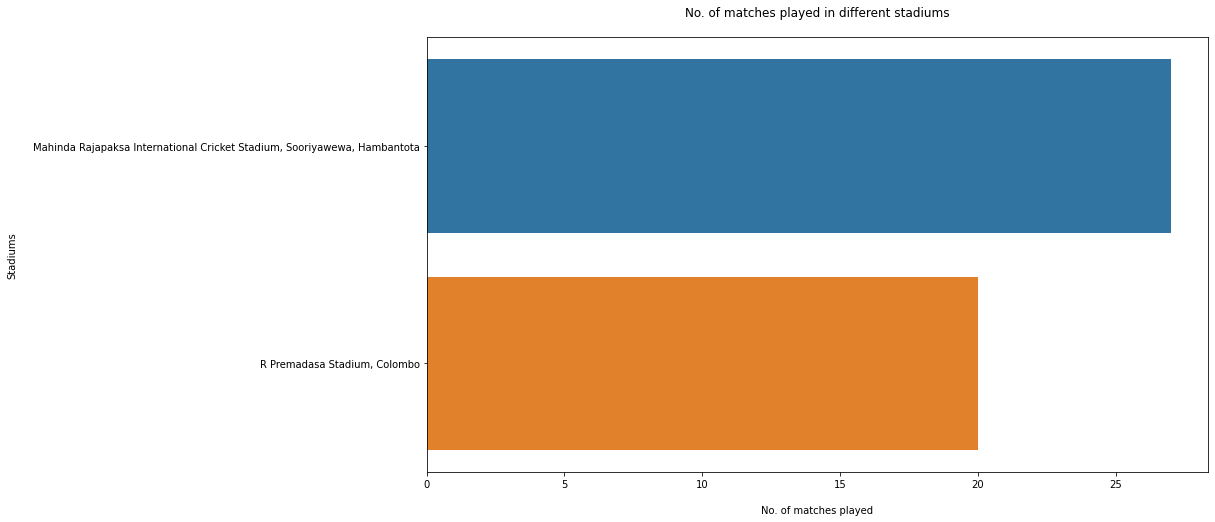

In [34]:
# No. of matches played in different stadiums
sns.countplot(y='venue', data=matches)
plt.title('No. of matches played in different stadiums\n')
plt.xlabel('\nNo. of matches played')
plt.ylabel('Stadiums\n')
plt.show()